In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, GRU, LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 读取数据
data_path = "datasets_raw_processed.csv"
power_raw = np.array(pd.read_csv(data_path).iloc[:,1]).reshape(-1,1)
scaler = MinMaxScaler()
power_norm = scaler.fit_transform(power_raw)
X = power_norm[:-1]
y = power_norm[1:]
n_points = len(power_raw)
train_points = -1080
X_train, X_test = X[:train_points], X[train_points:]
y_train, y_test = y[:train_points], y[train_points:]

In [3]:
keras.backend.clear_session()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
print(X_test.shape)

(9834, 1, 1)
(1080, 1, 1)


In [4]:
model = Sequential()
model.add(SimpleRNN(units=10, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
nb_epoch = 100
model.fit(X_train, y_train, epochs=nb_epoch, batch_size=36)

Epoch 1/100
274/274 [==============================] - 2s 2ms/step - loss: 0.1349
Epoch 2/100
274/274 [==============================] - 1s 3ms/step - loss: 0.0277
Epoch 3/100
274/274 [==============================] - 1s 2ms/step - loss: 0.0145
Epoch 4/100
274/274 [==============================] - 1s 2ms/step - loss: 0.0128
Epoch 5/100
274/274 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 6/100
274/274 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 7/100
274/274 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 8/100
274/274 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 9/100
274/274 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 10/100
274/274 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 11/100
274/274 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 12/100
274/274 [==============================] - 1s 2ms/step - loss: 0.0128
Epoch 13/100


34/34 [==============================] - 0s 2ms/step


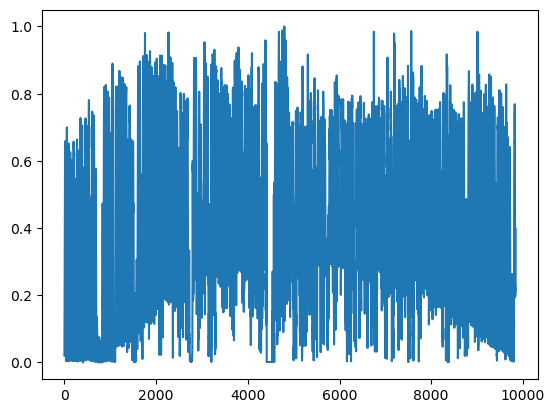

In [6]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.plot(range(len(y_train)), y_train)

[10.07315444946289, 14.152509689331055, 19.492019653320312, 23.194673538208008, 25.16412353515625, 27.31883430480957, 30.626815795898438, 39.80358123779297, 54.57191848754883, 64.43013763427734, 72.14500427246094, 78.70822143554688, 82.26996612548828, 85.31986236572266, 87.13558197021484, 86.5209732055664, 85.07609558105469, 81.84756469726562, 74.93900299072266, 68.98322296142578, 58.04823684692383, 47.80193328857422, 41.13666534423828, 38.59526824951172, 34.70821762084961, 30.8730411529541, 31.28506851196289, 29.035680770874023, 22.03666114807129, 16.56678009033203, 12.60732364654541, 9.289702415466309, 6.47532320022583, 2.5137062072753906, 1.9798189401626587, 2.5190999507904053, 6.048706531524658, 8.219983100891113, 11.883284568786621, 17.284852981567383, 20.92645263671875, 22.6884708404541, 25.0189208984375, 29.49129295349121, 40.06299591064453, 51.76933288574219, 62.85218811035156, 69.89542388916016, 76.81291198730469, 80.10802459716797, 83.44338989257812, 84.89781951904297, 85.207

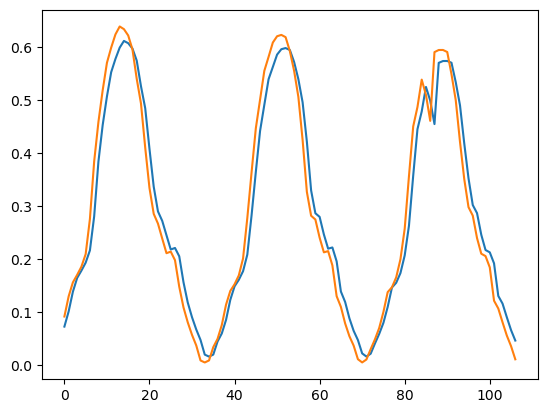

In [7]:
start = -108
end = -1
plt.plot(y_test_pred[start:end])
plt.plot(y_test[start:end])

y_pred_real = scaler.inverse_transform(y_test_pred) # 预测数据
y_test_raw = scaler.inverse_transform(y_test) # 实测数据

y_pred_real = y_pred_real.reshape(-1).tolist()
y_test_raw = y_test_raw.reshape(-1).tolist()
print(y_pred_real[start:end])
